In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from mlscorecheck import auc

In [ ]:
data = pd.read_csv('aggregated.csv')

In [ ]:
data.head()

Unnamed: 0       dataset   k       acc     sens     spec       auc  \
0           0   abalone9_18   5  0.908400  0.48056  0.93474  0.716189   
1           1  appendicitis  10  0.803650  0.45000  0.89584  0.743056   
2           2    australian   2  0.569550  0.03265  1.00000  0.716136   
3           3          bupa   7  0.423229  1.00000  0.00510  0.732602   
4           4           CM1   5  0.901620  0.00000  1.00000  0.597264   

   best_acc  best_sens  best_spec  threshold  best_threshold  best_acc_orig  \
0   0.94256   0.000000   1.000000   0.055180             inf        0.94256   
1   0.81274   0.533330   0.884730   0.986773        0.333333        0.81274   
2   0.68115   0.586200   0.757250   0.932181        0.419929        0.68115   
3   0.70110   0.690114   0.710414   0.046065        0.425281        0.70110   
4   0.90162   0.000000   1.000000   0.859359             inf        0.90162   

     p    n  
0   42  689  
1   21   85  
2  307  383  
3  145  200  
4   49  449

In [ ]:
lower_bounds = ['min', 'rmin', 'amin', 'armin']
upper_bounds = ['max', 'amax', 'maxa']

In [ ]:
def wrapper(func, **kwargs):
    #try:
        return func(**kwargs)
    #except:
    #    return None

In [ ]:
def wrapper_debug(func, **kwargs):
    try:
        print(kwargs, flush=True)
        return func(**kwargs)
    except Exception as exc:
        return str(exc)

In [ ]:
for lb in lower_bounds:
    data[f'auc_{lb}'] = data.apply(
        lambda row:
        wrapper_debug(auc.auc_lower_from_aggregated,
        scores={
            'acc': row['acc'],
            'sens': row['sens'],
            'spec': row['spec']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        lower=lb),
        axis=1
    )

{'scores': {'acc': 0.9084, 'sens': 0.48056, 'spec': 0.93474}, 'folding': {'p': 42, 'n': 689, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.80365, 'sens': 0.45, 'spec': 0.8958400000000001}, 'folding': {'p': 21, 'n': 85, 'n_repeats': 1, 'n_folds': 10, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.56955, 'sens': 0.03265, 'spec': 1.0}, 'folding': {'p': 307, 'n': 383, 'n_repeats': 1, 'n_folds': 2, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.4232285714285714, 'sens': 1.0, 'spec': 0.0051}, 'folding': {'p': 145, 'n': 200, 'n_repeats': 1, 'n_folds': 7, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.90162, 'sens': 0.0, 'spec': 1.0}, 'folding': {'p': 49, 'n': 449, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.8622000000000001, 'sens': 0.922

In [ ]:
for ub in upper_bounds:
    data[f'auc_{ub}'] = data.apply(
        lambda row:
        wrapper_debug(
        auc.auc_upper_from_aggregated,
        scores={
            'acc': row['acc'] if ub != 'maxa' else row['best_acc'],
            'sens': row['sens'] if ub != 'maxa' else row['best_sens'],
            'spec': row['spec'] if ub != 'maxa' else row['best_spec']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        upper=ub),
        axis=1
    )

{'scores': {'acc': 0.9084, 'sens': 0.48056, 'spec': 0.93474}, 'folding': {'p': 42, 'n': 689, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.80365, 'sens': 0.45, 'spec': 0.8958400000000001}, 'folding': {'p': 21, 'n': 85, 'n_repeats': 1, 'n_folds': 10, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.56955, 'sens': 0.03265, 'spec': 1.0}, 'folding': {'p': 307, 'n': 383, 'n_repeats': 1, 'n_folds': 2, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.4232285714285714, 'sens': 1.0, 'spec': 0.0051}, 'folding': {'p': 145, 'n': 200, 'n_repeats': 1, 'n_folds': 7, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.90162, 'sens': 0.0, 'spec': 1.0}, 'folding': {'p': 49, 'n': 449, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.8622000000000001, 'sens': 0.922

In [ ]:
lower_bounds = ['min', 'rmin']
upper_bounds = ['max', 'rmax']

In [ ]:
for lb in lower_bounds:
    data[f'acc_{lb}'] = data.apply(
        lambda row:
        wrapper_debug(auc.acc_lower_from_aggregated,
        scores={
            'acc': row['acc'],
            'sens': row['sens'],
            'spec': row['spec'],
            'auc': row['auc']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        lower=lb),
        axis=1
    )

{'scores': {'acc': 0.9084, 'sens': 0.48056, 'spec': 0.93474, 'auc': 0.7161891580568192}, 'folding': {'p': 42, 'n': 689, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.80365, 'sens': 0.45, 'spec': 0.8958400000000001, 'auc': 0.7430555555555556}, 'folding': {'p': 21, 'n': 85, 'n_repeats': 1, 'n_folds': 10, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.56955, 'sens': 0.03265, 'spec': 1.0, 'auc': 0.7161360586132491}, 'folding': {'p': 307, 'n': 383, 'n_repeats': 1, 'n_folds': 2, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.4232285714285714, 'sens': 1.0, 'spec': 0.0051, 'auc': 0.7326019570389732}, 'folding': {'p': 145, 'n': 200, 'n_repeats': 1, 'n_folds': 7, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.90162, 'sens': 0.0, 'spec': 1.0, 'auc': 0.5972639755860729}, 'folding': {'p': 49, 'n': 449, 'n_repeats':

In [ ]:
for ub in upper_bounds:
    data[f'acc_{ub}'] = data.apply(
        lambda row:
        wrapper_debug(auc.acc_upper_from_aggregated,
        scores={
            'acc': row['acc'],
            'sens': row['sens'],
            'spec': row['spec'],
            'auc': row['auc']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        upper=ub),
        axis=1
    )

{'scores': {'acc': 0.9084, 'sens': 0.48056, 'spec': 0.93474, 'auc': 0.7161891580568192}, 'folding': {'p': 42, 'n': 689, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.80365, 'sens': 0.45, 'spec': 0.8958400000000001, 'auc': 0.7430555555555556}, 'folding': {'p': 21, 'n': 85, 'n_repeats': 1, 'n_folds': 10, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.56955, 'sens': 0.03265, 'spec': 1.0, 'auc': 0.7161360586132491}, 'folding': {'p': 307, 'n': 383, 'n_repeats': 1, 'n_folds': 2, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.4232285714285714, 'sens': 1.0, 'spec': 0.0051, 'auc': 0.7326019570389732}, 'folding': {'p': 145, 'n': 200, 'n_repeats': 1, 'n_folds': 7, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.90162, 'sens': 0.0, 'spec': 1.0, 'auc': 0.5972639755860729}, 'folding': {'p': 49, 'n': 449, 'n_repeats':

In [ ]:
lower_bounds = ['min']
upper_bounds = ['max', 'rmax']

In [ ]:
for lb in lower_bounds:
    data[f'max_acc_{lb}'] = data.apply(
        lambda row:
        wrapper_debug(auc.max_acc_lower_from_aggregated,
        scores={
            'acc': row['acc'],
            'sens': row['sens'],
            'spec': row['spec'],
            'auc': row['auc']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        lower=lb),
        axis=1
    )

{'scores': {'acc': 0.9084, 'sens': 0.48056, 'spec': 0.93474, 'auc': 0.7161891580568192}, 'folding': {'p': 42, 'n': 689, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.80365, 'sens': 0.45, 'spec': 0.8958400000000001, 'auc': 0.7430555555555556}, 'folding': {'p': 21, 'n': 85, 'n_repeats': 1, 'n_folds': 10, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.56955, 'sens': 0.03265, 'spec': 1.0, 'auc': 0.7161360586132491}, 'folding': {'p': 307, 'n': 383, 'n_repeats': 1, 'n_folds': 2, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.4232285714285714, 'sens': 1.0, 'spec': 0.0051, 'auc': 0.7326019570389732}, 'folding': {'p': 145, 'n': 200, 'n_repeats': 1, 'n_folds': 7, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'lower': 'min'}
{'scores': {'acc': 0.90162, 'sens': 0.0, 'spec': 1.0, 'auc': 0.5972639755860729}, 'folding': {'p': 49, 'n': 449, 'n_repeats':

In [ ]:
for ub in upper_bounds:
    data[f'max_acc_{ub}'] = data.apply(
        lambda row:
        wrapper_debug(auc.max_acc_upper_from_aggregated,
        scores={
            'acc': row['acc'],
            'sens': row['sens'],
            'spec': row['spec'],
            'auc': row['auc']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        upper=ub),
        axis=1
    )

{'scores': {'acc': 0.9084, 'sens': 0.48056, 'spec': 0.93474, 'auc': 0.7161891580568192}, 'folding': {'p': 42, 'n': 689, 'n_repeats': 1, 'n_folds': 5, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.80365, 'sens': 0.45, 'spec': 0.8958400000000001, 'auc': 0.7430555555555556}, 'folding': {'p': 21, 'n': 85, 'n_repeats': 1, 'n_folds': 10, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.56955, 'sens': 0.03265, 'spec': 1.0, 'auc': 0.7161360586132491}, 'folding': {'p': 307, 'n': 383, 'n_repeats': 1, 'n_folds': 2, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.4232285714285714, 'sens': 1.0, 'spec': 0.0051, 'auc': 0.7326019570389732}, 'folding': {'p': 145, 'n': 200, 'n_repeats': 1, 'n_folds': 7, 'folding': 'stratified_sklearn'}, 'eps': 0.0001, 'upper': 'max'}
{'scores': {'acc': 0.90162, 'sens': 0.0, 'spec': 1.0, 'auc': 0.5972639755860729}, 'folding': {'p': 49, 'n': 449, 'n_repeats':

In [ ]:
data[data['auc'] > 0.999]

Unnamed: 0           dataset   k       acc      sens      spec  \
12            12             iris0   2  1.000000  1.000000  1.000000   
15            15            monk-2   8  1.000000  1.000000  1.000000   
21            21  shuttle-c0-vs-c4   8  1.000000  1.000000  1.000000   
40            40             iris0   6  1.000000  1.000000  1.000000   
43            43            monk-2   3  0.923600  0.838233  1.000000   
...          ...               ...  ..       ...       ...       ...   
2760        2760      new_thyroid1   6  0.981333  1.000000  0.977783   
2765        2765  shuttle-c0-vs-c4  10  0.997250  0.975010  0.998820   
2768        2768            vowel0   7  0.981757  0.989014  0.981057   
2784        2784             iris0   5  1.000000  1.000000  1.000000   
2793        2793  shuttle-c0-vs-c4  10  0.999450  0.992310  1.000000   

           auc  best_acc  best_sens  best_spec  ...  auc_max  auc_amax  \
12    1.000000  1.000000   1.000000   1.000000  ...      1.0       1.0   
15    1.000000  1.000000   1.000000   1.000000  ...      1.0       1.0   
21    1.000000  1.000000   1.000000   1.000000  ...      1.0       1.0   
40    1.000000  1.000000   1.000000   1.000000  ...      1.0       1.0   
43    0.999226  0.988433   0.990200   0.986833  ...      1.0       1.0   
...        ...       ...        ...        ...  ...      ...       ...   
2760  1.000000  0.995367   0.972217   1.000000  ...      1.0       1.0   
2765  1.000000  0.998350   1.000000   0.998230  ...      1.0       1.0   
2768  0.999056  0.996971   0.966129   1.000000  ...      1.0       1.0   
2784  1.000000  1.000000   1.000000   1.000000  ...      1.0       1.0   
2793  1.000000  1.000000   1.000000   1.000000  ...      1.0       1.0   

      auc_maxa   acc_min  acc_rmin   acc_max  acc_rmax  max_acc_min  \
12    1.000000  0.333300  0.333333  1.000000       1.0          1.0   
15    1.000000  0.472174  0.472222  1.000000       1.0          1.0   
21    1.000000  0.067240  0.067247  1.000000       1.0     0.998763   
40    1.000000  0.333297  0.333333  1.000000       1.0          1.0   
43    0.999736  0.471810  0.472222  0.999682  0.999682     0.979128   
...        ...       ...       ...       ...       ...          ...   
2760  0.999925  0.162682  0.162698  1.000000       1.0          1.0   
2765  0.999981  0.067242  0.067249  1.000000       1.0     0.998893   
2768  0.999948  0.090996  0.091093  0.999928  0.999928     0.987837   
2784  1.000000  0.333300  0.333333  1.000000       1.0          1.0   
2793  1.000000  0.067242  0.067249  1.000000       1.0     0.998893   

     max_acc_max  max_acc_rmax  
12      1.000000           1.0  
15      1.000000           1.0  
21      1.000000           1.0  
40      1.000000           1.0  
43      0.999682      0.999682  
...          ...           ...  
2760    1.000000           1.0  
2765    1.000000           1.0  
2768    0.999928      0.999928  
2784    1.000000           1.0  
2793    1.000000           1.0  

[349 rows x 29 columns]

In [ ]:
data.to_csv('aggregated-processed.csv', index=False)

In [19]:
for col in ['auc_min', 'auc_rmin', 'auc_amin',
       'auc_armin', 'auc_max', 'auc_amax', 'auc_maxa', 'acc_min', 'acc_rmin',
       'acc_max', 'acc_rmax', 'max_acc_min', 'max_acc_max', 'max_acc_rmax']:
    print(col, len(data[data[col].apply(lambda x: x.__class__ == str)]))

auc_min 0
auc_rmin 65
auc_amin 0
auc_armin 51
auc_max 0
auc_amax 0
auc_maxa 0
acc_min 0
acc_rmin 0
acc_max 0
acc_rmax 56
max_acc_min 1040
max_acc_max 0
max_acc_rmax 56


In [20]:
col = 'max_acc_min'
data[data[col].apply(lambda x: x.__class__ == str)][[col]].groupby(col).agg({col: 'count'})

max_acc_min
max_acc_min                                                    
auc too small (macc_min_aggregated)                        1037
no optimal solution found for the configuration...            3

In [21]:
col = 'acc_rmax'
data[data[col].apply(lambda x: x.__class__ == str)][[col]]

acc_rmax
88    auc too small (acc_rmax_aggregated)
122   auc too small (acc_rmax_aggregated)
130   auc too small (acc_rmax_aggregated)
234   auc too small (acc_rmax_aggregated)
270   auc too small (acc_rmax_aggregated)
354   auc too small (acc_rmax_aggregated)
458   auc too small (acc_rmax_aggregated)
592   auc too small (acc_rmax_aggregated)
654   auc too small (acc_rmax_aggregated)
690   auc too small (acc_rmax_aggregated)
704   auc too small (acc_rmax_aggregated)
738   auc too small (acc_rmax_aggregated)
802   auc too small (acc_rmax_aggregated)
878   auc too small (acc_rmax_aggregated)
962   auc too small (acc_rmax_aggregated)
970   auc too small (acc_rmax_aggregated)
1012  auc too small (acc_rmax_aggregated)
1040  auc too small (acc_rmax_aggregated)
1138  auc too small (acc_rmax_aggregated)
1152  auc too small (acc_rmax_aggregated)
1214  auc too small (acc_rmax_aggregated)
1264  auc too small (acc_rmax_aggregated)
1446  auc too small (acc_rmax_aggregated)
1488  auc too small (acc_rmax_aggregated)
1586  auc too small (acc_rmax_aggregated)
1600  auc too small (acc_rmax_aggregated)
1614  auc too small (acc_rmax_aggregated)
1670  auc too small (acc_rmax_aggregated)
1698  auc too small (acc_rmax_aggregated)
1718  auc too small (acc_rmax_aggregated)
1754  auc too small (acc_rmax_aggregated)
1810  auc too small (acc_rmax_aggregated)
1880  auc too small (acc_rmax_aggregated)
1914  auc too small (acc_rmax_aggregated)
1936  auc too small (acc_rmax_aggregated)
1964  auc too small (acc_rmax_aggregated)
2006  auc too small (acc_rmax_aggregated)
2048  auc too small (acc_rmax_aggregated)
2082  auc too small (acc_rmax_aggregated)
2132  auc too small (acc_rmax_aggregated)
2202  auc too small (acc_rmax_aggregated)
2221  auc too small (acc_rmax_aggregated)
2222  auc too small (acc_rmax_aggregated)
2278  auc too small (acc_rmax_aggregated)
2306  auc too small (acc_rmax_aggregated)
2370  auc too small (acc_rmax_aggregated)
2412  auc too small (acc_rmax_aggregated)
2474  auc too small (acc_rmax_aggregated)
2482  auc too small (acc_rmax_aggregated)
2524  auc too small (acc_rmax_aggregated)
2538  auc too small (acc_rmax_aggregated)
2566  auc too small (acc_rmax_aggregated)
2586  auc too small (acc_rmax_aggregated)
2614  auc too small (acc_rmax_aggregated)
2670  auc too small (acc_rmax_aggregated)
2706  auc too small (acc_rmax_aggregated)

In [22]:
row = data.loc[38]
auc.acc_upper_from_aggregated(
        scores={
            'acc': row['acc'],
            'sens': row['sens'],
            'spec': row['spec'],
            'auc': row['auc']
        },
        folding={
            'p': row['p'],
            'n': row['n'],
            'n_repeats': 1,
            'n_folds': row['k'],
            'folding': 'stratified_sklearn'
        },
        eps=1e-4,
        upper='rmax')

np.float64(0.8213575054899781)

In [20]:
data.columns

Index(['Unnamed: 0', 'dataset', 'k', 'acc', 'sens', 'spec', 'auc', 'best_acc',
       'best_sens', 'best_spec', 'threshold', 'best_threshold',
       'best_acc_orig', 'p', 'n', 'auc_min', 'auc_rmin', 'auc_amin',
       'auc_armin', 'auc_max', 'auc_amax', 'auc_maxa', 'acc_min', 'acc_rmin',
       'acc_max', 'acc_rmax', 'max_acc_min', 'max_acc_max', 'max_acc_rmax'],
      dtype='object')

In [ ]:
data['auc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_cmin_max_int'] = data.apply(
    lambda row:
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ),
axis=1)

data['auc_max_acc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_max_acc_cmin_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ), 
axis=1)

data['auc_max_acc_min_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='amax'
        ), 
axis=1)

data['auc_max_acc_cmin_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='amax'
        ), 
axis=1)

In [ ]:
data['acc_min_max_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='max'
        ), 
axis=1)

data['acc_min_cmax_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='cmax'
        ), 
axis=1)

In [ ]:
for label in ['auc_min_max_int', 'auc_cmin_max_int', 
              'auc_max_acc_min_max_int', 'auc_max_acc_cmin_max_int', 
              'auc_max_acc_min_amax_int', 'auc_max_acc_cmin_amax_int', 
              'acc_min_max_int', 'acc_min_cmax_int']:
    data[label[:-4]] = data[label].apply(lambda x: None if x is None else (x[0] + x[1])/2.0)

In [ ]:
data['auc_min_max_diff'] = data['auc'] - data['auc_min_max']
data['auc_cmin_max_diff'] = data['auc'] - data['auc_cmin_max']
data['auc_max_acc_min_max_diff'] = data['auc'] - data['auc_max_acc_min_max']
data['auc_max_acc_cmin_max_diff'] = data['auc'] - data['auc_max_acc_cmin_max']
data['auc_max_acc_min_amax_diff'] = data['auc'] - data['auc_max_acc_min_amax']
data['auc_max_acc_cmin_amax_diff'] = data['auc'] - data['auc_max_acc_cmin_amax']

data['acc_min_max_diff'] = data['best_acc'] - data['acc_min_max']
data['acc_min_cmax_diff'] = data['best_acc'] - data['acc_min_cmax']

In [ ]:
(np.mean(np.abs(data['auc_min_max_diff']) / data['auc']), 
 np.mean(np.abs(data['auc_cmin_max_diff']) / data['auc']))

(np.float64(0.1282681101795442), np.float64(0.06667071954273698))

In [ ]:
figsize = (3.5, 2)
figsize2 = (2, 2)
n_bins = 20

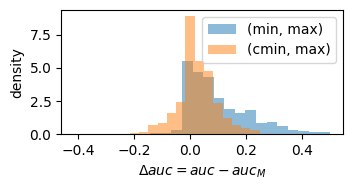

In [ ]:
plt.figure(figsize=figsize)
plt.hist(data['auc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta auc = auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-hist-kfold.pdf')
plt.show()

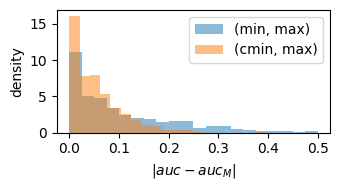

In [ ]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-abs-hist-kfold.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_22506/967181890.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta auc_M$ (cmin, max)')


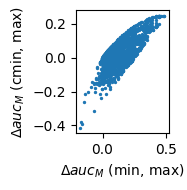

In [ ]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_min_max_diff'], data['auc_cmin_max_diff'], s=2)
plt.xlabel(r'$\Delta auc_M$ (min, max)')
plt.ylabel('$\Delta auc_M$ (cmin, max)')
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-scatter-kfold.pdf')
plt.show()

In [ ]:
wilcoxon(
    np.abs(data.dropna()['auc_cmin_max_diff']), 
    np.abs(data.dropna()['auc_min_max_diff']), 
    alternative='less'
)

WilcoxonResult(statistic=np.float64(102553.0), pvalue=np.float64(3.2799052213986947e-202))

In [ ]:
(np.mean(np.abs(data['auc_max_acc_min_max_diff']) / data['auc']), 
np.mean(np.abs(data['auc_max_acc_cmin_max_diff']) / data['auc']),
np.mean(np.abs(data['auc_max_acc_min_amax_diff']) / data['auc']), 
np.mean(np.abs(data['auc_max_acc_cmin_amax_diff']) / data['auc']))

(np.float64(0.08513017769728413),
 np.float64(0.046863852054966335),
 np.float64(0.09684754832406983),
 np.float64(0.05168497998805046))

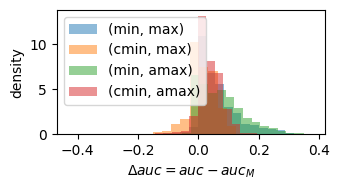

In [ ]:
plt.figure(figsize=figsize)
plt.hist(data['auc_max_acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_min_amax_diff'], label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_cmin_amax_diff'], label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta auc = auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-hist-kfold.pdf')
plt.show()

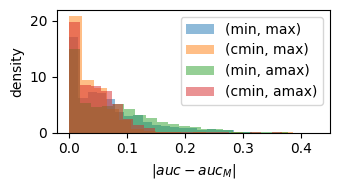

In [ ]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_max_acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_min_amax_diff']), label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_cmin_amax_diff']), label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-abs-hist-kfold.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_22506/3396233447.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta auc_M$ (cmin, amax)')


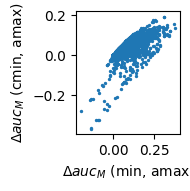

In [ ]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_max_acc_min_amax_diff'], data['auc_max_acc_cmin_amax_diff'], s=2)
plt.xlabel(r'$\Delta auc_M$ (min, amax)')
plt.ylabel('$\Delta auc_M$ (cmin, amax)')
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-scatter-kfold.pdf')
plt.show()

In [ ]:
wilcoxon(
    np.abs(data.dropna()['auc_max_acc_cmin_amax_diff']), 
    np.abs(data.dropna()['auc_max_acc_min_amax_diff']), 
    alternative='less'
)

WilcoxonResult(statistic=np.float64(46021.0), pvalue=np.float64(1.300316940987457e-241))

In [ ]:
(np.mean(np.abs(data['acc_min_max_diff']) / data['best_acc']),
 np.mean(np.abs(data['acc_min_cmax_diff']) / data['best_acc']))

(np.float64(0.030945651939492058), np.float64(0.027901818177332526))

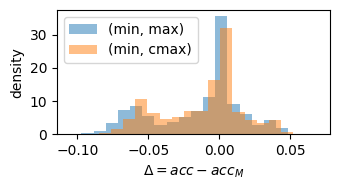

In [ ]:
plt.figure(figsize=figsize)
plt.hist(data['acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['acc_min_cmax_diff'], label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta = acc - acc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-hist-kfold.pdf')
plt.show()

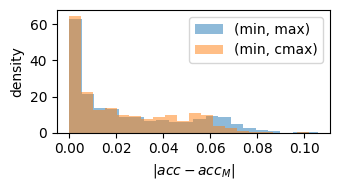

In [ ]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['acc_min_cmax_diff']), label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert acc - acc_M \vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-abs-hist-kfold.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_22506/4026538229.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta acc_M$ (min, amax)')


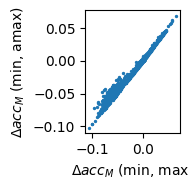

In [ ]:
plt.figure(figsize=figsize2)
plt.scatter(data['acc_min_max_diff'], data['acc_min_cmax_diff'], s=2)
plt.xlabel(r'$\Delta acc_M$ (min, max)')
plt.ylabel('$\Delta acc_M$ (min, amax)')
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-scatter-kfold.pdf')
plt.show()